In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from src.data.DataLoader import get_dataset

# zuerst files die ich brauche temporär downloaden oder direkt laden mittels library, dann hat man es lokal
#      und von dort aus richtigen Pfad nehmen
# get out_dir (ist in den runs in out_dir eingespeichert)
# dann files öffnen
# in pd dataframes laden: pd.read_csv(out_dir + "/file")
# dann mit plot aus tutorial anzeigen lassenfrom

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#data_handler, d_args = get_handler_and_args("CIFAR10")
# S: Das sind die Roh-Daten, die (bzw. X_tr) müssen mit PCA oder Tsne transformiert werden.
# Dann werden diese Daten im zweidimensionalen Raum geplottet
X_tr, Y_tr, X_te, Y_te = get_dataset("CIFAR10")
rng = np.random.RandomState(0)
colors = rng.rand(10)
colors
X_tr

Files already downloaded and verified
Files already downloaded and verified


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [2]:
Y_tr

tensor([6, 9, 9,  ..., 9, 1, 1])

In [3]:
sampled_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/1_statistics.csv")

In [4]:
budget_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/1_budget.csv")
budget_data

,Unnamed: 0,idx,centroid
0,0,6508,1
1,1,45653,0
2,2,26132,0
3,3,20348,0
4,4,3234,3
...,...,...,...
9995,9995,7226,0
9996,9996,29211,0
9997,9997,9172,5
9998,9998,24612,5


In [5]:
#sampled_data = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/1_statistics.csv")
embedding_df = pd.read_csv("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/embeddings.csv")
embedding_df

,0.0,0.0.1,0.0.2,0.0.3,0.07062753,0.0.4,0.0.5,0.00614826,0.022441868,0.03678839,...,0.07741595,0.0325633,0.0.66,0.005682628,0.0.67,0.0.68,0.0.69,0.0.70,0.09326382,0.0.71
0,0.000000,0.000000,0.000000,0.000000,0.155974,0.000000,0.035108,0.366391,0.000000,0.102541,...,0.007398,0.000000,0.0,0.000000,0.078549,0.642825,0.285696,0.0,0.000000,0.039935
1,0.000000,0.000000,0.000000,0.033646,0.103260,0.008876,0.000000,0.467064,0.109069,0.007835,...,0.036055,0.000000,0.0,0.000000,0.000000,0.024840,0.372711,0.0,0.021991,0.000000
2,0.023754,0.000000,0.090703,0.000000,0.000000,0.618205,0.000000,0.071470,0.000000,0.000000,...,0.000375,1.590342,0.0,0.000000,0.000000,0.095224,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.001346,0.000000,0.339996,0.000000,0.000000,1.098964,0.138447,0.028403,...,0.000916,0.000000,0.0,0.000000,0.000155,0.906116,1.020311,0.0,0.003049,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.137094,0.000000,0.000000,0.613516,0.000000,0.015911,...,0.000000,0.000000,0.0,0.000000,0.022238,0.963921,0.364223,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.227373,0.131169,0.566953,0.000000,0.126017,0.865338,0.073682,0.266110,0.000000,0.007343,...,0.141386,0.000000,0.0,0.017896,0.021517,1.209907,0.155696,0.0,0.000000,0.000000
49995,0.000000,0.000000,0.000000,0.000000,0.207290,0.000000,0.000000,0.417223,0.000000,0.167855,...,0.049757,0.000000,0.0,0.012965,0.028613,0.126805,0.078693,0.0,0.013237,0.000000
49996,0.000000,0.000000,0.000000,0.000000,0.199833,0.000000,0.029859,0.702423,0.008646,0.100594,...,0.001957,0.000000,0.0,0.000000,0.017676,0.817891,0.454467,0.0,0.001411,0.000000
49997,0.000000,0.000000,0.241900,0.054122,0.003730,0.356042,0.014048,0.039190,0.135638,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.336793,0.564218,0.0,0.000000,0.046437


In [6]:
embedding_array = np.array(embedding_df)
embedding_array.shape

(49999, 128)

In [11]:
budget_tr = embedding_array[budget_data['idx']]
#x = budget_tr.reshape(budget_tr.shape[0], -1)
#print(x)
budget_tr.shape

(10000, 128)

In [12]:
def label_scatter(data_points, sampled, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    print(num_classes)
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #c=palette[labels.astype(np.int)
    weights_datapoints = np.arange(1, 11)
    weights_sampled = np.arange(1, len(sampled)+1)
    #c=label, cmap=matplotlib.colors.ListedColormap(colors)
    sc_data_points = ax.scatter(data_points[:,0], data_points[:,1], lw=0, s=40, c=labels, cmap='Greys')
    sc_sampled = ax.scatter(sampled[:,0], sampled[:,1], lw=0, s=40, c='red')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    txts = []


In [13]:
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

time_start = time.time()


In [14]:
#sampled_data['img_id']
Sampled = embedding_array[sampled_data['img_id']]
#sampled = Sampled.reshape(Sampled.shape[0], -1)
Sampled.shape

(1000, 128)

In [15]:
#pca_result_data_points = pca.fit_transform(x)
tsne_budget = TSNE(random_state=10).fit_transform(budget_tr)
tsne_budget

array([[ 75.88749  , -31.39739  ],
       [-45.23066  , -58.51513  ],
       [ 26.59307  , -57.66786  ],
       ...,
       [-19.785276 , -51.846455 ],
       [ -6.1414948,  27.358967 ],
       [ 23.594677 ,   3.798584 ]], dtype=float32)

In [16]:
#pca_result_sampled = pca.fit_transform(sampled)
tsne_sampled = TSNE(random_state=10).fit_transform(Sampled)
tsne_sampled

array([[-33.96947  ,  -5.1961145],
       [-36.743996 ,  -8.512675 ],
       [-18.588043 ,  -6.981357 ],
       ...,
       [  0.3181046,  14.847312 ],
       [-23.399845 ,  -4.939881 ],
       [ 25.555014 , -16.693615 ]], dtype=float32)

In [17]:
len(Y_tr[1:50000])

49999

10
[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


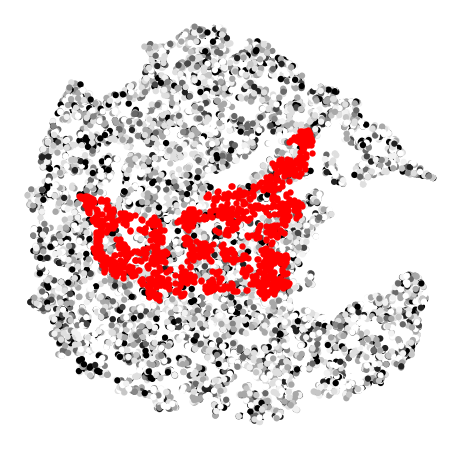

In [18]:
label_scatter(tsne_budget, tsne_sampled, budget_data['centroid'])